<a href="https://colab.research.google.com/github/sogol-golafshan/demo-repo/blob/main/Data_Augmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import misc, ndimage
import keras
import random
import os
from keras import backend as K
from keras.preprocessing.image import ImageDataGenerator
%matplotlib inline

In [2]:
# plots images with labels within jupyter notebook
def plots(ims, figsize=(12,6), rows=1, interp=False, titles=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
        if (ims.shape[-1] != 3):
            ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i], interpolation=None if interp else 'none')

In [3]:
gen = ImageDataGenerator(rotation_range = 10, width_shift_range=0.1,
                         height_shift_range = 0.1, shear_range = 0.15, zoom_range = 0.1,
                         channel_shift_range = 10, horizontal_flip = True)

In [10]:
%cd

/root


In [22]:
#chosen_image = random.choice(os.listdir('/root/data/dogs-vs-cats/train/dog'))

In [4]:
image_path = '/root/data/dogs-vs-cats/train/dog/S3PlrO.jpg'

In [5]:
#obtain image
image = np.expand_dims(plt.imread(image_path),0)

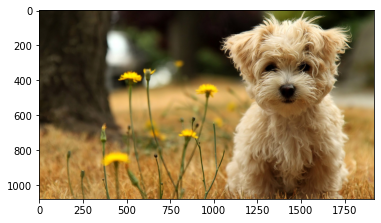

In [6]:
plt.imshow(image[0])

In [7]:
#Generate batches of augmented images from this image
aug_iter = gen.flow(image)

In [8]:
#Get 10 samples of augmented images
aug_images = [next(aug_iter)[0].astype(np.uint8) for i in range(10)]

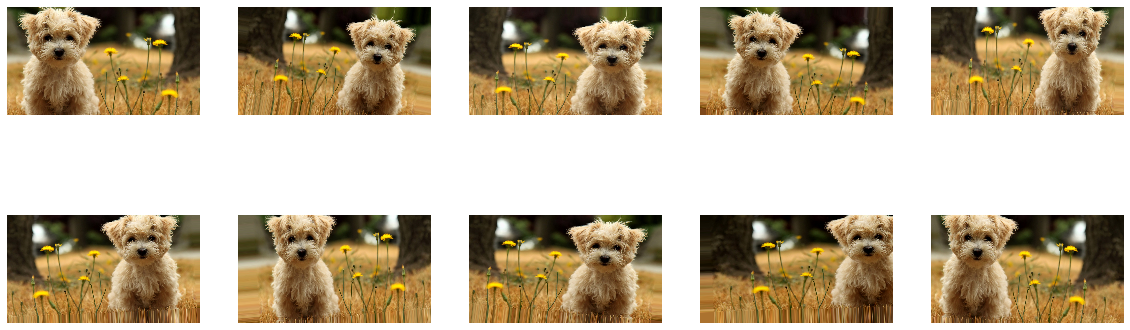

In [10]:
#Augmented Images
plots(aug_images, figsize=(20,7), rows=2)